#### Import Libaries

In [209]:
pip install graphviz

     |████████████████████████████████| 47 kB 5.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import graphviz

#### Read Data 

In [5]:
data = pd.read_csv("game_diff_upd.csv")

In [6]:
data

,YEAR,ROUND,HSEED,HTEAM,HSCORE,LSEED,LTEAM,LSCORE,SCORE_DIFF,G,...,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T,UPSET
0,2013,1,6,UCLA,83,11,Minnesota,83,-20,-1,...,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5,-1
1,2013,1,8,Colorado State,72,9,Missouri,72,12,-1,...,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9,1
2,2013,1,5,Wisconsin,57,12,Mississippi,57,-11,1,...,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0,-1
3,2013,1,4,Michigan,56,13,South Dakota State,56,15,6,...,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8,1
4,2013,1,6,Butler,56,11,Bucknell,56,12,2,...,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021,2,1,Michigan,78,8,LSU,78,8,-3,...,-2.1,-8.0,-5.0,-4.6,0.3,-9.0,3.7,3.5,-3.5,1
379,2021,2,2,Iowa,95,7,Oregon,95,-15,-3,...,-2.4,-1.4,-5.2,4.5,0.5,4.1,-0.7,-1.2,-2.8,-1
380,2021,2,3,Kansas,85,6,USC,85,-34,2,...,4.8,0.4,7.0,-1.7,2.8,-3.7,1.0,1.6,-1.0,-1
381,2021,2,5,Creighton,58,13,Ohio,58,14,6,...,-3.9,0.8,-2.7,-4.5,-0.1,-5.5,0.1,-1.6,-0.2,1


### Check for Collinearity

In [8]:
cor = data.corr()

<AxesSubplot:>

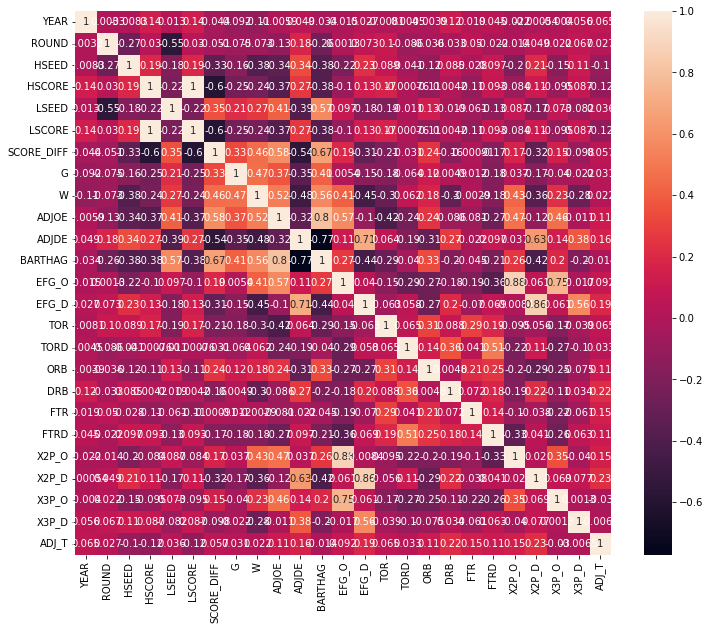

In [7]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor, annot=True)

In [9]:
for col in cor.columns:
    for i in cor.columns:
        if abs(cor.loc[i,col]) > .7:
            if i != col:
                print(i,col) 

LSCORE HSCORE
HSCORE LSCORE
UPSET SCORE_DIFF
BARTHAG ADJOE
BARTHAG ADJDE
EFG_D ADJDE
ADJOE BARTHAG
ADJDE BARTHAG
X2P_O EFG_O
X3P_O EFG_O
ADJDE EFG_D
X2P_D EFG_D
EFG_O X2P_O
EFG_D X2P_D
EFG_O X3P_O
SCORE_DIFF UPSET


In [51]:
no_corr_data = data.drop(axis = 1, columns = ["BARTHAG", "EFG_O","EFG_D","HSCORE","LSCORE","ROUND", "ADJOE","ADJDE"])

#### Splitting Data Based on time split

In [52]:
train_data = no_corr_data[no_corr_data["YEAR"]<= 2018]
test_data = no_corr_data[no_corr_data["YEAR"]> 2018]

In [53]:
X_train = train_data.drop(axis =1, columns = ["SCORE_DIFF","HTEAM", "LTEAM","UPSET","YEAR", 'HSEED', 'LSEED'])
X_test = test_data.drop(axis =1, columns = ["SCORE_DIFF","HTEAM", "LTEAM","UPSET","YEAR", 'HSEED', 'LSEED'])

In [54]:
X_train.columns

Index(['G', 'W', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', 'X2P_O', 'X2P_D',
       'X3P_O', 'X3P_D', 'ADJ_T'],
      dtype='object')

In [55]:
Y_test = test_data["SCORE_DIFF"]
Y_train =train_data["SCORE_DIFF"]

#### Model with default parameters

In [56]:

model = xgboost.XGBRegressor(max_depth = 3)

In [57]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
no_param_pred_OS = model.predict(X_test)
no_param_pred_IS = model.predict(X_train)

In [59]:
print(r2_score(Y_test, no_param_pred_OS))

0.21556728921165347


In [60]:
print(r2_score(Y_train, no_param_pred_IS))

0.972096403736013


In [94]:
model.feature_importances_

array([0.0231344 , 0.14966051, 0.07293477, 0.28233668, 0.03994957,
       0.0491222 , 0.0602024 , 0.03353921, 0.04010101, 0.0428529 ,
       0.03001564, 0.06895161, 0.04606336, 0.02114178, 0.03999408],
      dtype=float32)

In [95]:
model.feature_names_in_

array(['HSEED', 'LSEED', 'G', 'W', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR',
       'FTRD', 'X2P_O', 'X2P_D', 'X3P_O', 'X3P_D', 'ADJ_T'], dtype='<U5')

### Running Grid Search CV

In [61]:
params = {
        'min_child_weight': [1],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [.6,.8,1.0],
        'colsample_bytree': [.6,.8,1.0],
        'max_depth': [2, 3, 4, 5],
        'n_estimators': [20,50,100,300,500,1000]
        }

In [63]:
X = no_corr_data.drop(axis =1, columns = ['HSEED', 'LSEED', "SCORE_DIFF","HTEAM", "LTEAM","UPSET","YEAR"])
Y = no_corr_data["SCORE_DIFF"]

In [64]:
xgb_grid = GridSearchCV(model,
                        params,
                        cv = 5,
                        n_jobs = 5,
                        scoring = 'r2',
                        verbose=True)

xgb_grid.fit(X,Y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012,...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),


In [68]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.24932169718314356
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 20, 'subsample': 1.0}


In [69]:
parameters = xgb_grid.best_params_
best_mod = xgboost.XGBRegressor(n_estimators=20, gamma = 1.5, min_child_weight = 1, max_depth=3, eta=0.1, subsample=.8, colsample_bytree=.8)

In [70]:
best_mod.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [71]:
param_pred_OS = best_mod.predict(X_test)
param_pred_IS = best_mod.predict(X_train)

In [72]:
r2_score(Y_test, param_pred_OS)

0.21906580924132824

In [73]:
r2_score(Y_train, param_pred_IS)

0.4836483943829062

# CART

In [77]:
from sklearn import tree

In [74]:
X_cart = no_corr_data.drop(axis = 1,columns = ['HSEED', 'LSEED',"SCORE_DIFF","HTEAM", "LTEAM","UPSET"])

In [75]:
X_train_cart = X_cart[X_cart["YEAR"]<=2018]
X_test_cart = X_cart[X_cart["YEAR"]>2018]

In [78]:
clf = tree.DecisionTreeRegressor(max_depth = 3)
clf = clf.fit(X_train_cart.drop(columns=["YEAR"]), Y_train)

[Text(0.5, 0.875, 'X[1] <= 6.5\nsquared_error = 181.567\nsamples = 288\nvalue = 7.219'),
 Text(0.25, 0.625, 'X[0] <= 1.5\nsquared_error = 157.419\nsamples = 198\nvalue = 3.247'),
 Text(0.125, 0.375, 'X[4] <= 11.8\nsquared_error = 136.376\nsamples = 85\nvalue = -1.0'),
 Text(0.0625, 0.125, 'squared_error = 124.846\nsamples = 83\nvalue = -0.422'),
 Text(0.1875, 0.125, 'squared_error = 25.0\nsamples = 2\nvalue = -25.0'),
 Text(0.375, 0.375, 'X[9] <= -2.55\nsquared_error = 149.468\nsamples = 113\nvalue = 6.442'),
 Text(0.3125, 0.125, 'squared_error = 68.815\nsamples = 27\nvalue = 12.667'),
 Text(0.4375, 0.125, 'squared_error = 158.808\nsamples = 86\nvalue = 4.488'),
 Text(0.75, 0.625, 'X[1] <= 9.5\nsquared_error = 123.665\nsamples = 90\nvalue = 15.956'),
 Text(0.625, 0.375, 'X[0] <= 9.0\nsquared_error = 117.01\nsamples = 50\nvalue = 12.9'),
 Text(0.5625, 0.125, 'squared_error = 95.183\nsamples = 49\nvalue = 12.204'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 47.0'),
 

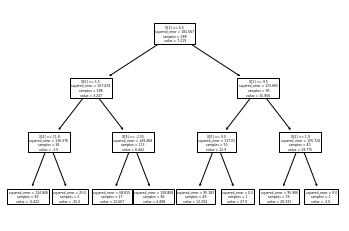

In [79]:
tree.plot_tree(clf)

In [80]:
cart_pred_OS = clf.predict(X_test_cart.drop(columns=["YEAR"]))
cart_pred_IS = clf.predict(X_train_cart.drop(columns=["YEAR"]))


In [81]:
r2_score(Y_train, cart_pred_IS)

0.3434011291563447

In [82]:
r2_score(Y_test, cart_pred_OS)

0.14201835095829574

## using grid seach CV

In [83]:
parameters={"max_depth" : [1,2,3,4,5],
           "min_samples_leaf":[1,2,3,4,5]}
 


In [84]:
cart = tree.DecisionTreeRegressor()

In [85]:
tuning_model=GridSearchCV(cart,param_grid=parameters,scoring='r2',cv=5,verbose=3)

In [86]:
tuning_model.fit(X_cart,no_corr_data["SCORE_DIFF"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...max_depth=1, min_samples_leaf=1;, score=0.222 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=1;, score=0.110 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=1;, score=0.247 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=1;, score=0.130 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=1;, score=0.185 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=2;, score=0.222 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=2;, score=0.110 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=2;, score=0.247 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=2;, score=0.130 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=2;, score=0.185 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=3;, score=0.222 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=3

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='r2', verbose=3)

In [87]:
tuning_model.best_score_

0.17866943830749846

In [90]:
train_pred_cart_cv = tuning_model.best_estimator_.predict(X_train_cart)
test_pred_cart_cv = tuning_model.best_estimator_.predict(X_test_cart)

In [91]:
r2_score(Y_train, train_pred_cart_cv)

0.19084159050588034

In [92]:
r2_score(Y_test, test_pred_cart_cv)

0.1841476989598575